In [216]:
# LOGISTIC REGRESSION ON HR ANALYTICS

In [217]:
import pandas as pd
import matplotlib
import sklearn
import seaborn as sns



In [218]:
df = pd.read_csv("/Users/amalsorathia/Downloads/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [219]:
df.columns
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [237]:
df3 = df.drop(['Department', 'salary'], axis=1)
df2 = df3.groupby('left').mean()
df2

#higher satisfaction is less likely to leave
#more hours is more likely to leave
#others don't give us much

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

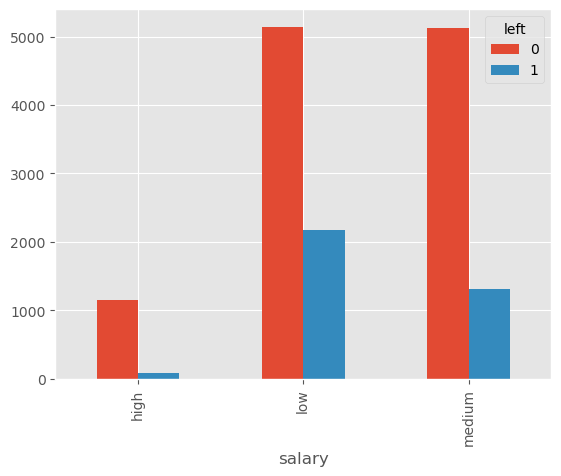

In [238]:
# #exploratory data analysis

# #categorical variables -> department (nominal), salary (ordinal), left (nominal), promotion_last_5years (nominal), work_accident (nominal)
# #continuous variables -> satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company

# #possible relationships
# dept, salary, promotion, average_montly_hours, satisfaction_level, workaccident, on retention




pd.crosstab(df.salary,df.left).plot(kind='bar')
#employees with higher salaries less likely to leave

<Axes: xlabel='Department'>

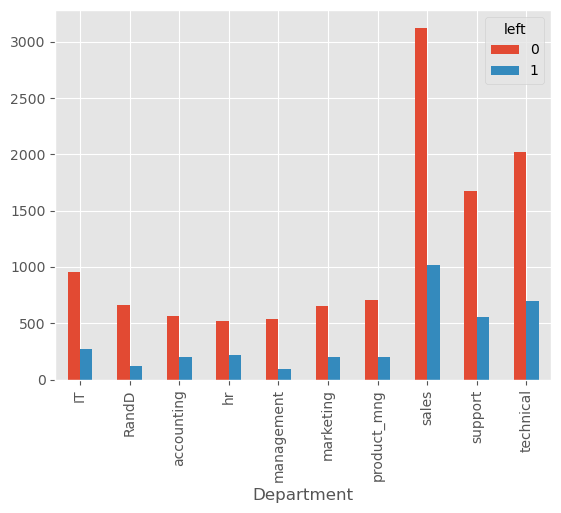

In [239]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

#dept doesn't have huge effect on retention


In [266]:
import sklearn.linear_model as linear_model
from sklearn import model_selection


model = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)


In [267]:
sal_dum = pd.get_dummies(df.salary, dtype = 'int')
sal_dum.drop(['medium'], axis=1)


print(sal_dum)


       high  low  medium
0         0    1       0
1         0    0       1
2         0    0       1
3         0    1       0
4         0    1       0
...     ...  ...     ...
14994     0    1       0
14995     0    1       0
14996     0    1       0
14997     0    1       0
14998     0    1       0

[14999 rows x 3 columns]


In [268]:
df.columns
df1 = df.drop(['salary', 'Department', 'left', 'number_project', 'last_evaluation', 'time_spend_company' ], axis = 1)

df.columns

In [269]:

X = pd.concat([sal_dum, df1], axis = 1).values


In [270]:
y = df.left

In [271]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [272]:
X_train

array([[  0.,   0.,   1., ..., 244.,   0.,   0.],
       [  0.,   0.,   1., ..., 231.,   0.,   0.],
       [  0.,   0.,   1., ..., 273.,   0.,   0.],
       ...,
       [  0.,   0.,   1., ..., 160.,   0.,   0.],
       [  0.,   1.,   0., ..., 176.,   1.,   0.],
       [  0.,   1.,   0., ..., 149.,   0.,   0.]])

In [273]:
X_test

array([[  0.,   1.,   0., ..., 260.,   0.,   0.],
       [  0.,   1.,   0., ..., 307.,   0.,   0.],
       [  0.,   0.,   1., ..., 270.,   1.,   0.],
       ...,
       [  0.,   0.,   1., ..., 194.,   0.,   0.],
       [  1.,   0.,   0., ..., 255.,   0.,   0.],
       [  0.,   1.,   0., ..., 263.,   0.,   0.]])

In [274]:
y_test

719      1
1761     1
6761     0
14476    1
14863    1
        ..
13205    0
5589     0
6750     0
10000    0
6805     0
Name: left, Length: 3000, dtype: int64

In [275]:
y_train

9972     0
6758     0
4817     0
11026    0
11153    0
        ..
444      1
5186     0
13894    0
9095     0
8169     0
Name: left, Length: 11999, dtype: int64

In [276]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [277]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [278]:
model.score(X_test, y_test)

0.789

In [279]:
model.predict_log_proba(X_test)

array([[-0.20095956, -1.70344925],
       [-1.52350254, -0.245833  ],
       [-0.08331832, -2.52645672],
       ...,
       [-0.17668939, -1.82040617],
       [-0.02209539, -3.82341367],
       [-0.20902002, -1.66801553]])